<a href="https://colab.research.google.com/github/Pedramghaderi022/1D_Plotter_GUI/blob/main/Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Salam
#Mounting a virtual drive on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

# Replace 'data_file.txt' with the path to your data file
file_path = '/content/drive/MyDrive/Colab Notebooks/Fitting_Data/OA1.txt'

try:
    # Initialize empty lists for the two columns
    column1 = []
    column2 = []

    # Open the file and read its contents
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into two parts based on the number of spaces
            parts = line.split()

            if len(parts) >= 2:
                # Extract the first and second columns
                first_column = float(parts[0])
                second_column = float(parts[1])

                # Append the values to the respective lists
                column1.append(first_column)
                column2.append(second_column)

    # Convert the lists to numpy arrays
    column1 = np.array(column1)
    column2 = np.array(column2)

    # Define the window size for the moving average for the y-axis (column2)
    window_size = 3  # You can adjust this as needed

    # Extend the data at the beginning and end to address edge effects
    column2_padded = np.pad(column2, (window_size // 2, window_size // 2), mode='edge')

    # Apply the moving average filter to column2 (y-axis)
    smoothed_column2 = np.convolve(column2_padded, np.ones(window_size) / window_size, mode='valid')

    # Print the data in the two columns with smoothed y-axis
    print("Column 1:")
    print(column1)
    print("Smoothed Column 2 (y-axis):")
    print(smoothed_column2)

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Column 1:
[-1.22 -1.18 -1.14 -1.1  -1.06 -1.02 -0.98 -0.94 -0.9  -0.86 -0.82 -0.78
 -0.74 -0.7  -0.66 -0.62 -0.58 -0.54 -0.5  -0.46 -0.42 -0.38 -0.34 -0.3
 -0.26 -0.22 -0.18 -0.14 -0.1  -0.06 -0.02  0.02  0.06  0.1   0.14  0.18
  0.22  0.26  0.3   0.34  0.38  0.42  0.46  0.5   0.54  0.58  0.62  0.66
  0.7   0.74  0.78  0.82  0.86  0.9   0.94  0.98  1.02  1.06  1.1   1.14
  1.18  1.22  1.26]
Smoothed Column 2 (y-axis):
[2.97764967e-05 2.90734662e-05 2.85495194e-05 2.81339694e-05
 2.81694905e-05 2.78371887e-05 2.76201101e-05 2.76992790e-05
 2.81457666e-05 2.81650813e-05 2.79451236e-05 2.77671156e-05
 2.77838324e-05 2.77015449e-05 2.74408644e-05 2.78457966e-05
 2.81650374e-05 2.87098082e-05 2.84429023e-05 2.89541121e-05
 2.85689185e-05 2.89150822e-05 2.83167059e-05 2.85205989e-05
 2.80915082e-05 2.81661748e-05 2.80894772e-05 2.92537010e-05
 3.07903562e-05 3.25252218e-05 3.33477408e-05 3.33536225e-05
 3.28040748e-05 3.14579105e-05 3.03387573e-05 2.96027642e-05
 2.93062926e-05 2.91293049e-0

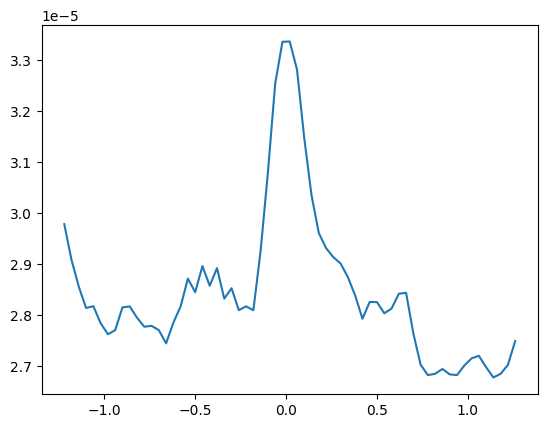

In [ ]:
#Smoothed data (y-axis)
plt.plot(column1,smoothed_column2)
plt.show()

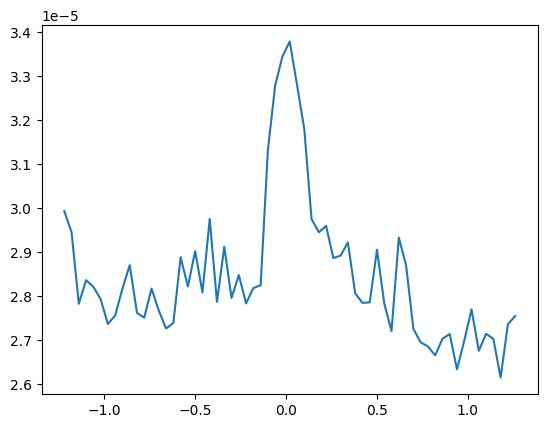

In [ ]:
#Raw data (No smoothing)
plt.plot(column1,column2)
plt.show()

In [ ]:
from traitlets.traitlets import Any
import numpy as np
import scipy.optimize as optimize

#Unit ha ro to ein dataset avaz kon

#path1 = 'C:/Users/mabbasi2/OneDrive - University of Ottawa/Whiteboards/Documents/Matlab/Mishka/Multist/Intensity 80-different angels-H and V pol/505/V'
#path2 = 'C:/Users/mabbasi2/OneDrive - University of Ottaw/Whiteboards/Documents/Matlab/Mishka/Multist/beam'
path1 = '/content/drive/MyDrive/Colab Notebooks/Fitting_Data/505/V'
path2 = '/content/drive/MyDrive/Colab Notebooks/Fitting_Data/beam'

Pref = np.genfromtxt(f'{path1}/Reference.txt', delimiter='\t')
OA = np.genfromtxt(f'{path1}/NormReflectance.txt', delimiter='\t')
CA = np.genfromtxt(f'{path1}/NormCAOA .txt', delimiter='\t')
Di = np.genfromtxt(f'{path2}/beam_dia_at_foccus_um.txt', delimiter='\t')
Pa_all = np.genfromtxt(f'{path2}/pave_uw.txt', delimiter='\t')

z0 = 12.2 * 1e-3  # mm
z = (np.arange(0, 25.4, 0.4) - z0) * 1e3

OA1 = OA[:len(z), 1]
CA1 = CA[:len(z), 1]

lmbd = 505 * 1e-9

w0 = (Di[10, 1] + Di[11, 1]) / 2 / 2  # um
pa = Pa_all[10, 1]  # uW

zr = np.pi * w0**2 / (lmbd * 1e6)  # um
w = w0 * np.sqrt(1 + (z / zr)**2)  # um

rep = 50
ls = 405 * 1e-9

k = 2 * np.pi / lmbd

Ep = pa / rep
Ppk = 2 * np.sqrt(np.log(2) / np.pi) * Ep / rep
I = 2e8 * Ppk / (np.pi * w0**2)
Iz = 2e8 * Ppk / (np.pi * w**2)

c0 = 299792458  # m/s
eps0 = 8.854187817e-12

epsr = 0
epsi = 0.2
eps_s = np.sqrt(epsr + 1j * epsi)
nr = np.real(np.sqrt(eps_s))
ni = np.imag(np.sqrt(eps_s))

alpha = 4 * np.pi * np.sqrt(ni) / lmbd
leff = (1 - np.exp(-alpha * ls)) / alpha

#beta = 1e-6

# def model(x, Iz, alpha, ls, leff):
#     Iz = Iz
#     return Iz * np.exp(-alpha * ls) / (1 + x * leff * Iz)

# initial_guess = 1e-6

# best_fit_beta, _ = optimize.curve_fit(model(x, Iz, alpha, ls, leff), z, OA1, P0=initial_guess)
# fit_result = model(best_fit_beta, Iz, alpha, ls, leff)

# print("Best-fit beta:", best_fit_beta)


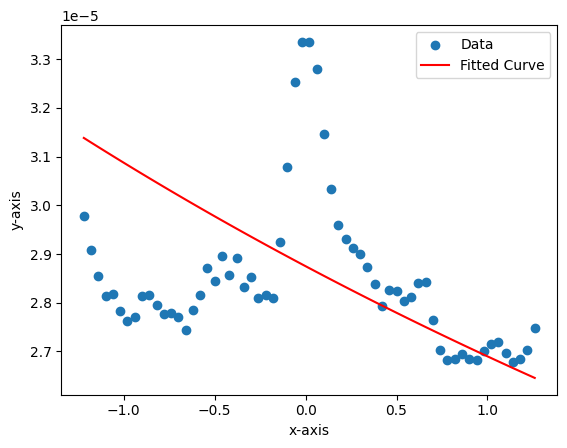

Fitted Iz: 0.17129206048659557
Fitted alpha: 1.3418364849660809
Fitted ls: 6.47809059327614
Fitted leff: 0.4016327620952138


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the function you want to fit to
def model(x, Iz, alpha, ls, leff):
    return Iz * np.exp(-alpha * ls) / (1 + x * leff * Iz)

# Load your dataset
x_data =  column1  # Replace with your x-axis data
y_data = smoothed_column2  # Replace with your y-axis data

# Initial guess for the parameters (Iz, alpha, ls, leff)
initial_guess = (1.0, 1.0, 1.0, 1.0)

# Set bounds for the parameters
bounds = ([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf])  # Adjust bounds as needed

# Fit the data to the model with bounds
params, covariance = curve_fit(model, x_data, y_data, p0=initial_guess, bounds=bounds)

# Extract the fitted parameters
Iz_fit, alpha_fit, ls_fit, leff_fit = params

# Create the fitted curve using the fitted parameters
y_fit = model(x_data, Iz_fit, alpha_fit, ls_fit, leff_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

# Print the fitted parameters
print("Fitted Iz:", Iz_fit)
print("Fitted alpha:", alpha_fit)
print("Fitted ls:", ls_fit)
print("Fitted leff:", leff_fit)
